# Label text analysis

In [28]:
# Import relevant libraries
import pandas as pd

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\504631\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\504631\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# Read CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\504631\OneDrive - Amey plc\Documents\GitHub\wid_hackathon\datasets\4a072b2e8410.csv')

In [30]:
# Display information about dataset
print(df.head())
print(df.info())

                                                 URL   KEYWORD_TOPIC  POST_ID  \
0  https://www.mumsnet.com/talk/feeling_depressed...   Mental health  4897127   
1  https://www.mumsnet.com/talk/style_and_beauty/...  Style & Beauty  4918149   
2  https://www.mumsnet.com/talk/_chat/4773637-wil...            Chat  4773637   
3  https://www.mumsnet.com/talk/_chat/4773420-i-a...            Chat  4773420   
4  https://www.mumsnet.com/talk/sex/4949886-perio...             Sex  4949886   

                                       POST_TITLE             USERNAME  \
0  Depressed DH, ruined business, I'm spiralling.     LittleAnonymouse   
1                       Cool alternative to Jeans         misshappycat   
2                         Will it ever come back?         Chaseandrace   
3               I absolutely hate sex with my LTP         lustornolust   
4                                      Period sex  ShouldThisBeAnIssue   

    POST_DATE                                       POST_CONTENT  \


## Frequency Analysis

In [31]:
# Tokenize the labels
tokens = [word_tokenize(label) for label in df['POST_TITLE']]

# Flatten the list of tokens
flat_tokens = [token for sublist in tokens for token in sublist]

# Calculate word frequencies
freq_dist = FreqDist(flat_tokens)

# Print the most common words
print(freq_dist.most_common(10))

[('?', 2424), ('to', 2175), ('a', 1473), ('the', 1419), ('.', 1330), ('I', 1159), (',', 1059), ('-', 976), ('of', 954), ('!', 841)]


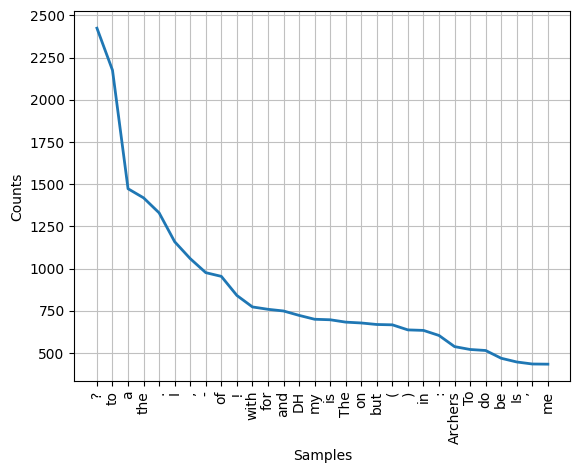

In [32]:
# Plot the frequency distribution
freq_dist.plot(30, cumulative=False)
plt.show()

In [33]:
df_freq = pd.DataFrame(freq_dist.items(), columns=['word', 'frequency'])

In [34]:
# Display information about dataset
print(df_freq.head())
print(df_freq.info())

        word  frequency
0  Depressed         46
1         DH        723
2          ,       1059
3     ruined         63
4   business         90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       1676 non-null   object
 1   frequency  1676 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.3+ KB
None


In [35]:
# Remove first row
df_freq = df_freq.iloc[1: , :]

# Sort by frequency
df_freq = df_freq.sort_values(['frequency'], ascending=[False])

In [36]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_freq)

                        word  frequency
18                         ?       2424
11                        to       2175
56                         a       1473
64                       the       1419
8                          .       1330
5                          I       1159
2                          ,       1059
75                         -        976
81                        of        954
52                         !        841
22                      with        773
189                      for        759
118                      and        749
1                         DH        723
23                        my        700
34                        is        697
70                       The        683
66                        on        678
58                       but        669
39                         (        667
43                         )        637
50                        in        634
48                         :        604
44                   Archers        538


## Frequency Analysis using pre-processing

Use pre-processing to remove stopwords and perform stemming

In [37]:
# Read CSV file into a DataFrame
df2 = pd.read_csv(r'C:\Users\504631\OneDrive - Amey plc\Documents\GitHub\wid_hackathon\datasets\4a072b2e8410.csv')

In [38]:
# Apply pre-processing to labels
# Tokenize, remove stopwords, and perform stemming
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_label(label):
    words = word_tokenize(label)
    words = [ps.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

# Apply the preprocessing function to the 'labels' column
df2['normalized_label'] = df2['POST_TITLE'].apply(preprocess_label)

# Calculate word frequencies for the normalized labels
normalized_tokens = [word_tokenize(label) for label in df2['normalized_label']]
flat_normalized_tokens = [token for sublist in normalized_tokens for token in sublist]
freq_dist_normalized = FreqDist(flat_normalized_tokens)

# Display the most common normalized words
print(freq_dist_normalized.most_common(10))

[('dh', 761), ('archer', 538), ('one', 382), ('thread', 380), ('want', 364), ('think', 301), ('firework', 277), ('write', 271), ('ambridg', 269), ('helen', 269)]


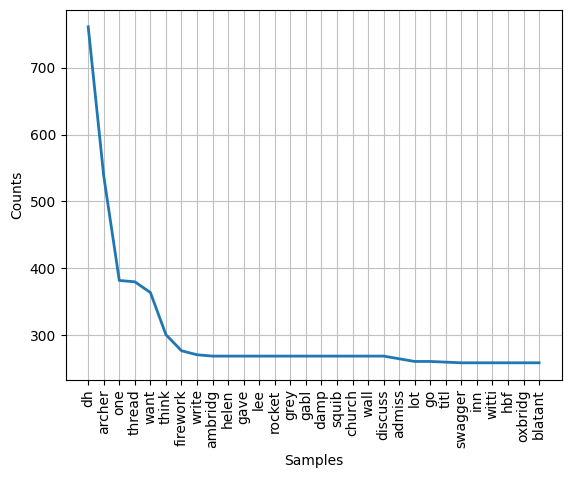

In [39]:
# Plot the frequency distribution
freq_dist_normalized.plot(30, cumulative=False)
plt.show()

In [40]:
# Create a DataFrame from the frequency distribution
labels_freq_df = pd.DataFrame(freq_dist_normalized.items(), columns=['Label', 'Frequency'])

# Sort the DataFrame by frequency in descending order
labels_freq_df = labels_freq_df.sort_values(by='Frequency', ascending=False)

# Increase the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(labels_freq_df)

              Label  Frequency
1                dh        761
22           archer        538
40              one        382
23           thread        380
105            want        364
72            think        301
24         firework        277
34            write        271
29           rocket        269
25          ambridg        269
26            helen        269
27             gave        269
31             gabl        269
30             grey        269
33            squib        269
35           church        269
36             wall        269
37          discuss        269
32             damp        269
28              lee        269
112          admiss        265
43              lot        261
56               go        261
42             titl        260
109         blatant        259
113          accord        259
108         oxbridg        259
44              hbf        259
41            witti        259
39              inn        259
114         potenti        259
38      